In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
#pd.__version__

In [4]:
Speed_Dating_df = pd.DataFrame()
Speed_Dating_df = pd.read_csv('Speed_Dating_Data.csv',encoding = "ISO-8859-1")
pd.set_option('display.max_column',40)
pd.set_option('display.max_row',20)
Speed_Dating_df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,...,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.00,10.00,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,6,16.0,0,0.25,0,25.0,2.0,50.00,0.00,30.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,7,17.0,0,0.34,0,30.0,2.0,35.00,15.00,25.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,8,18.0,0,0.50,0,27.0,2.0,33.33,11.11,11.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,9,19.0,1,0.28,0,28.0,2.0,50.00,0.00,25.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,10,20.0,0,-0.36,0,24.0,2.0,100.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [15]:
#Speed_Dating_Data.csv  speedating.csv
Speed_Dating_df = pd.DataFrame()
Speed_Dating_df = pd.read_csv('Speed_Dating_Data.csv',encoding = "ISO-8859-1")
print(Speed_Dating_df.shape)

import bottleneck as bn
def mean_age_of_wave(x):
    age = []
    for i in range(len(Speed_Dating_df['age'])):
        if Speed_Dating_df['wave'][i] == x:
            age.append(Speed_Dating_df['age'][i])
    median_age = round(bn.nanmean(age),2)
    return median_age

##samerace
index = Speed_Dating_df['samerace'].index[Speed_Dating_df['samerace'].apply(np.isnan)]
print("missing samerace",len(index))

##age
index = Speed_Dating_df['age'].index[Speed_Dating_df['age'].apply(np.isnan)]

#Speed_Dating_df.loc[index,'age'] = 25
for i in index:
    Speed_Dating_df.loc[i,'age'] = mean_age_of_wave(Speed_Dating_df['wave'][i])

index = Speed_Dating_df['age'].index[Speed_Dating_df['age'].apply(np.isnan)]
print("missing age",len(index))

(8378, 195)
missing samerace 0
missing age 0


In [16]:
##age_o
index = Speed_Dating_df['age_o'].index[Speed_Dating_df['age_o'].apply(np.isnan)]

for i in index:
    Speed_Dating_df.loc[i,'age_o'] = mean_age_of_wave(Speed_Dating_df['wave'][i])
index_o = Speed_Dating_df['age_o'].index[Speed_Dating_df['age_o'].apply(np.isnan)]
print("missing age_o",len(index_o))

missing age_o 0


In [17]:
###imprace shows how important the perticipiant think the importance of being the same race
###only 10 data are missing, so fill up NAN as 0
Speed_Dating_df['imprace'].fillna(value=0, inplace=True)
##same for imprelig since only 16 data are missing
Speed_Dating_df['imprelig'].fillna(value=0, inplace=True)

In [46]:
print(Speed_Dating_df.shape)
##Drop NAN from the following 7 columns
Speed_Dating_df = Speed_Dating_df.dropna(subset=['attr','sinc','intel','fun','amb','shar','like','dec'],how='any')
print(Speed_Dating_df.shape)

(7017, 195)
(7017, 195)


In [47]:
##Double check any NAN
index_attr = Speed_Dating_df['attr'].index[Speed_Dating_df['attr'].apply(np.isnan)]
print(len(index_attr))
index_sinc = Speed_Dating_df['sinc'].index[Speed_Dating_df['sinc'].apply(np.isnan)]
print(len(index_sinc))

0
0


In [48]:
X= pd.DataFrame()

y = Speed_Dating_df['match']
##
#feature_cols =['iid','gender','wave','samerace','age','age_o','imprace','imprelig','career_c','attr','sinc','intel','fun','amb','shar','like']
feature_cols =['attr','sinc','intel','fun','amb','shar','like']
##wave: round
##age_o: age of partner

def max_of_wave(f,x):
    data = []
    for i in range(len(Speed_Dating_df[f])):
        if Speed_Dating_df['wave'][i] == x:
            data.append(Speed_Dating_df[f][i])
    max_data = round(bn.nanmax(data),2)
    return max_data

X = Speed_Dating_df[feature_cols]

#onehot_gender = pd.get_dummies(Speed_Dating_df['gender'])
#onehot_gender[0]

#X = pd.concat([X, pd.get_dummies(Speed_Dating_df['gender'])], axis=1)
#X.rename(columns={0:"f", 1: "m"}, inplace=True)
#X = pd.concat([X, pd.get_dummies(Speed_Dating_df['samerace'])], axis=1)
#X.rename(columns={0:"samerace", 1: "notsamerace"}, inplace=True)


X = pd.concat([X, (Speed_Dating_df['age'] - Speed_Dating_df['age_o']).abs()], axis=1)
X.rename(columns={0:"age_diff"}, inplace=True)
#X = pd.concat([X, pd.get_dummies(Speed_Dating_df['career_c'])], axis=1)

##change samerace: 1 -> same -1-> not same
Speed_Dating_df.loc[Speed_Dating_df['samerace'] == 0,'samerace'] = -1 

##new race column by 
##row_index =  Speed_Dating_df[Speed_Dating_df['samerace'] == -1].index.tolist()
X = pd.concat([X,(Speed_Dating_df['samerace'] * Speed_Dating_df['imprace'])],axis=1)

X.rename(columns={0:"imprace"}, inplace=True)
print(X.head())


   attr  sinc  intel  fun  amb  shar  like  age_diff  imprace
0   6.0   9.0    7.0  7.0  6.0   5.0   7.0       6.0     -2.0
1   7.0   8.0    7.0  8.0  5.0   6.0   7.0       1.0     -2.0
2   5.0   8.0    9.0  8.0  5.0   7.0   7.0       1.0      2.0
3   7.0   6.0    8.0  7.0  6.0   8.0   7.0       2.0     -2.0
4   5.0   6.0    7.0  7.0  6.0   6.0   6.0       3.0     -2.0


In [49]:
##normalize
from sklearn import preprocessing
X = preprocessing.scale(X)

In [50]:
###Use Linear regression to find out which factor is more important
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
my_linreg = LinearRegression()

my_linreg.fit(X_train, y_train)
print("Theta0: ", my_linreg.intercept_)
print("coef of the features:\n ", my_linreg.coef_)

(5613, 9)
(5613,)
(1404, 9)
(1404,)
Theta0:  0.171463666808
coef of the features:
  [ 0.03097326 -0.01274744  0.01049255  0.0279182  -0.01479282  0.04058656
  0.0556556  -0.01925845  0.00145396]


In [51]:
y_prediction = my_linreg.predict(X_test)
print(y_prediction)

[ 0.12184732  0.18789258  0.16734791 ...,  0.1956856  -0.12618452
  0.04974202]


In [52]:
##RMSE
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print(rmse)

0.357332715449


In [53]:
## Use cross validation
from sklearn.cross_validation import cross_val_score
mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

[ 0.35323901  0.36725928  0.37202134  0.35655079  0.33080445  0.34589527
  0.36659524  0.36908323  0.35547761  0.33903002]
0.355595626409


In [78]:
###Can these features explain the decisions or not?
###Use dec (decision) instead of match
y_dec = Speed_Dating_df['dec']
feature_cols =['attr','sinc','intel','fun','amb','shar','like','imprace','imprelig']
X_dec = pd.DataFrame()
X_dec = Speed_Dating_df[feature_cols]

X_dec = pd.concat([X_dec, pd.get_dummies(Speed_Dating_df['gender'])], axis=1)
X_dec.rename(columns={0:"f", 1: "m"}, inplace=True)

X_dec = pd.concat([X_dec, (Speed_Dating_df['age'] - Speed_Dating_df['age_o']).abs()], axis=1)
X_dec.rename(columns={0:"age_diff"}, inplace=True)

print(X_dec.head())

X_dec = preprocessing.scale(X_dec)

X_dec_train, X_dec_test, y_dec_train, y_dec_test = train_test_split(X_dec, y_dec, test_size=0.3, random_state=2)
my_linreg = LinearRegression()

print(X_dec_train.shape)
print(y_dec_train.shape)
print(X_dec_test.shape)
print(y_dec_test.shape)

my_linreg.fit(X_dec_train, y_dec_train)
print("Theta0: ", my_linreg.intercept_)
print("coef: ", my_linreg.coef_)
y_prediction = my_linreg.predict(X_dec_test)
print(y_prediction)

mse = metrics.mean_squared_error(y_dec_test, y_prediction)
rmse = np.sqrt(mse)
print(rmse)
'''
When using "dec" instead of "match" as the target, Error rate actually got bigger
'''

   attr  sinc  intel  fun  amb  shar  like  imprace  imprelig    f    m  \
0   6.0   9.0    7.0  7.0  6.0   5.0   7.0      2.0       4.0  1.0  0.0   
1   7.0   8.0    7.0  8.0  5.0   6.0   7.0      2.0       4.0  1.0  0.0   
2   5.0   8.0    9.0  8.0  5.0   7.0   7.0      2.0       4.0  1.0  0.0   
3   7.0   6.0    8.0  7.0  6.0   8.0   7.0      2.0       4.0  1.0  0.0   
4   5.0   6.0    7.0  7.0  6.0   6.0   6.0      2.0       4.0  1.0  0.0   

   age_diff  
0       6.0  
1       1.0  
2       1.0  
3       2.0  
4       3.0  
(4911, 12)
(4911,)
(2106, 12)
(2106,)
Theta0:  0.428867890436
coef:  [ 0.12606448 -0.05373309 -0.00096947  0.03193479 -0.0330822   0.05265593
  0.15297113 -0.01570496 -0.01798314 -0.00885422  0.00885422 -0.0109051 ]
[ 0.35003012  0.54644956  0.39197188 ...,  0.78400396  0.48732725
  0.40095265]
0.407243105493
[ 0.73541963  0.76780627  0.74501425  0.75925926  0.77350427  0.71652422
  0.72895863  0.72610556  0.7360913   0.71041369]
KNN accuracy rate mean:  0.7399

In [63]:
##KNN
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(accuracy_list)
accuracy_cv = accuracy_list.mean()
print("KNN accuracy rate mean: ", accuracy_cv)

[ 0.81623932  0.82051282  0.81908832  0.81481481  0.82905983  0.81623932
  0.81766382  0.81623932  0.82453638  0.82714286]
KNN accuracy rate mean:  0.820153678361


In [64]:
##decision tree
my_decisiontree = DecisionTreeClassifier()
accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')
print(accuracy_list)
accuracy_cv = accuracy_list.mean()
print("Decision tree accuracy rate mean: ", accuracy_cv)

[ 0.74928775  0.74643875  0.71937322  0.71794872  0.77207977  0.73931624
  0.6994302   0.69373219  0.7446505   0.75571429]
Decision tree accuracy rate mean:  0.733797162261


Logistic Accuracy score 0.825498575499
Logistic Cross validation score:
[ 0.82621083  0.82763533  0.84472934  0.82763533  0.83048433  0.8005698
  0.82763533  0.82621083  0.81312411  0.83      ]
Logistic Cross validation accuracy mean: 0.825423521953
AUC 0.78610745234


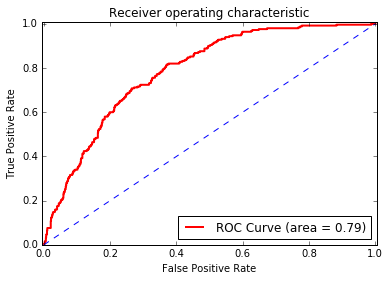

In [65]:
##Logistic regression
my_logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
from sklearn.metrics import accuracy_score
score_lr = accuracy_score(y_test, y_predict_lr)
print("Logistic Accuracy score", score_lr)

print("Logistic Cross validation score:")
accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
print(accuracy_list)
accuracy_cv = accuracy_list.mean()
print("Logistic Cross validation accuracy mean:", accuracy_cv)

y_predict_prob_lr = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)
print("AUC", AUC)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [67]:
###Differece between female and male?
female_row_index =  Speed_Dating_df[Speed_Dating_df['gender'] == 0].index.tolist()
male_row_index =  Speed_Dating_df[Speed_Dating_df['gender'] == 1].index.tolist()
X_f = Speed_Dating_df.loc[female_row_index,['attr','sinc','intel','fun','amb','shar','like']]
X_m = Speed_Dating_df.loc[male_row_index,['attr','sinc','intel','fun','amb','shar','like']]


y_f = Speed_Dating_df.loc[female_row_index,'dec']
y_m = Speed_Dating_df.loc[male_row_index,'dec']
#y_f = Speed_Dating_df.loc[female_row_index,'dec']
#y_m = Speed_Dating_df.loc[male_row_index,'dec']

X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.2, random_state=2)

f_linreg = LinearRegression()

f_linreg.fit(X_f_train, y_f_train)
print("female ", f_linreg.intercept_)
print("female ", f_linreg.coef_)


X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.2, random_state=2)

m_linreg = LinearRegression()

m_linreg.fit(X_m_train, y_m_train)
print("male ", m_linreg.intercept_)
print("male ", m_linreg.coef_)


##KNN female
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
accuracy_list = cross_val_score(knn, X_f, y_f, cv=10, scoring='accuracy')
#print("KNN accuracy list for female: ", accuracy_list)
accuracy_cv = accuracy_list.mean()
print("------------------------------------------")
print("KNN for female", accuracy_cv)

##KNN male
accuracy_list = cross_val_score(knn, X_m, y_m, cv=10, scoring='accuracy')
#print("KNN accuracy list for female: ", accuracy_list)
accuracy_cv = accuracy_list.mean()
print("KNN for male", accuracy_cv)
print("------------------------------------------")

##decision tree for female
my_decisiontree = DecisionTreeClassifier()
accuracy_list = cross_val_score(my_decisiontree, X_f, y_f, cv=10, scoring='accuracy')
#print("Decision Tree accuracy list for female: ", accuracy_list)
accuracy_cv = accuracy_list.mean()
print("Decision Tree mean for female: ", accuracy_cv)
##decision tree for male
my_decisiontree = DecisionTreeClassifier()
accuracy_list = cross_val_score(my_decisiontree, X_m, y_m, cv=10, scoring='accuracy')
#print("Decision Tree accuracy list for male: ", accuracy_list)
accuracy_cv = accuracy_list.mean()
print("Decision Tree mean for male: ", accuracy_cv)
print("------------------------------------------")

##Logistic regression for female
my_logreg = LogisticRegression()
accuracy_list = cross_val_score(my_logreg, X_f, y_f, cv=10, scoring='accuracy')
#print("Logistic accuracy list for female: ", accuracy_list)
accuracy_cv = accuracy_list.mean()
print("Logistic accuracy mean for female: ", accuracy_cv)

##Logistic regression for male
my_logreg = LogisticRegression()
accuracy_list = cross_val_score(my_logreg, X_m, y_m, cv=10, scoring='accuracy')
#print("Logistic accuracy list for male: ", accuracy_list)
accuracy_cv = accuracy_list.mean()
print("Logistic accuracy mean for male: ", accuracy_cv)

female  -0.360776272874
female  [ 0.0465007  -0.02469381  0.01140365  0.02099698 -0.01927993  0.02809303
  0.06585706]
male  -0.414388161412
male  [ 0.078383   -0.03273699 -0.0167324   0.0173144  -0.01670217  0.01380847
  0.10836705]
------------------------------------------
KNN for female 0.739082687339
KNN for male 0.757993454303
------------------------------------------
Decision Tree mean for female:  0.667555759554
Decision Tree mean for male:  0.685081118549
------------------------------------------
Logistic accuracy mean for female:  0.760614715082
Logistic accuracy mean for male:  0.775050582627


In [41]:
print ("Different between self evaluation and partner evaluation?")
SData = pd.DataFrame()
SData = Speed_Dating_df[['attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr_o','sinc_o','intel_o','fun_o','amb_o','shar','shar_o','like','like_o','match']]
SData.head()

Different between self evaluation and partner evaluation?


,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr_o,sinc_o,intel_o,fun_o,amb_o,shar,shar_o,like,like_o,match
0,6.0,8.0,8.0,8.0,7.0,6.0,8.0,8.0,8.0,8.0,5.0,6.0,7.0,7.0,0
1,6.0,8.0,8.0,8.0,7.0,7.0,8.0,10.0,7.0,7.0,6.0,5.0,7.0,8.0,0
2,6.0,8.0,8.0,8.0,7.0,10.0,10.0,10.0,10.0,10.0,7.0,10.0,7.0,10.0,1
3,6.0,8.0,8.0,8.0,7.0,7.0,8.0,9.0,8.0,9.0,8.0,8.0,7.0,7.0,1
4,6.0,8.0,8.0,8.0,7.0,8.0,7.0,9.0,6.0,9.0,6.0,7.0,6.0,8.0,1


In [42]:
SData = SData.dropna(subset=['attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr_o','sinc_o','intel_o','fun_o','amb_o','shar','shar_o','like','like_o','match'],how='any')

In [43]:
X2 = pd.DataFrame()
X2 = SData[['attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1',
           'attr_o','sinc_o','intel_o','fun_o','amb_o',
           'shar','shar_o','like','like_o']]
print(X2.shape)
y2 = SData['match']
print(y2.shape)

(5908, 14)
(5908,)


Logistic cross validation: 
 [ 0.84121622  0.85109983  0.84940778  0.83417936  0.84433164  0.8071066
  0.85617597  0.8440678   0.83389831  0.84067797]
Logistic cross validation mean: 
 0.840216146845
Logistic Accuracy score 0.847715736041
AUC 0.84843922761


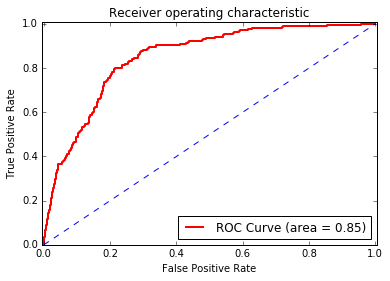

In [44]:
##Logistic regression
my_logreg = LogisticRegression()
accuracy_list = cross_val_score(my_logreg, X2, y2, cv=10, scoring='accuracy')
print("Logistic cross validation: \n", accuracy_list)
accuracy_cv = accuracy_list.mean()
print("Logistic cross validation mean: \n", accuracy_cv)

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=2)
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
score_lr = accuracy_score(y_test, y_predict_lr)
print("Logistic Accuracy score", score_lr)

y_predict_prob_lr = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)
print("AUC", AUC)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [45]:
##KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
accuracy_list = cross_val_score(knn, X2, y2, cv=10, scoring='accuracy')
print("KNN", accuracy_list)
accuracy_cv = accuracy_list.mean()
print("KNN accuracy mean",accuracy_cv)

KNN [ 0.83614865  0.83756345  0.80203046  0.79187817  0.82741117  0.79695431
  0.81895093  0.80508475  0.82033898  0.83559322]
KNN accuracy mean 0.817195409188


In [46]:
##decision tree
my_decisiontree = DecisionTreeClassifier()
accuracy_list = cross_val_score(my_decisiontree, X2, y2, cv=10, scoring='accuracy')
print("Decision tree", accuracy_list)
accuracy_cv = accuracy_list.mean()
print("Decision tree accuracy mean", accuracy_cv)

Decision tree [ 0.75506757  0.7749577   0.77326565  0.76480541  0.76480541  0.75296108
  0.72250423  0.75932203  0.79322034  0.77457627]
Decision tree accuracy mean 0.763548570402


In [71]:
'''
Accuracy improved in this case than using only the one-sided evaluation model
'''

'\nAccuracy improved in this case than using only the one-sided evaluation model\n'